In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

In [2]:
dataframe = pd.read_csv("Online retail.csv", sep=";")

In [3]:
print(dataframe.head())
print(len(dataframe))

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       InvoiceDate  UnitPrice  CustomerID         Country  
0  01.12.2010 8:26       2.55     17850.0  United Kingdom  
1  01.12.2010 8:26       3.39     17850.0  United Kingdom  
2  01.12.2010 8:26       2.75     17850.0  United Kingdom  
3  01.12.2010 8:26       3.39     17850.0  United Kingdom  
4  01.12.2010 8:26       3.39     17850.0  United Kingdom  
541909


In [4]:
# Обработка поля StockCode    
dataframe = dataframe[dataframe["StockCode"].apply(lambda x: any(c.isdigit() for c in x) and not x.endswith("C"))]

In [5]:
dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01.12.2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,4.15,12680.0,France


In [6]:
dataframe.groupby("Country")["Country"].count()

Country
Australia                 1249
Austria                    385
Bahrain                     18
Belgium                   1957
Brazil                      32
Canada                     149
Channel Islands            752
Cyprus                     614
Czech Republic              28
Denmark                    369
EIRE                      8105
European Community          55
Finland                    637
France                    8194
Germany                   9039
Greece                     140
Hong Kong                  277
Iceland                    179
Israel                     295
Italy                      776
Japan                      352
Lebanon                     45
Lithuania                   35
Malta                      115
Netherlands               2320
Norway                    1052
Poland                     335
Portugal                  1468
RSA                         57
Saudi Arabia                10
Singapore                  214
Spain                     2444


In [7]:
new_frame = dataframe.loc[dataframe['Country'] == 'Netherlands']


In [8]:
new_frame = new_frame[["InvoiceNo", 'Description']]

In [9]:
print(new_frame.isna().sum())
new_frame.dropna(inplace=True)

InvoiceNo      0
Description    0
dtype: int64


In [10]:
new_frame = new_frame.groupby("InvoiceNo")['Description'].apply(list).reset_index(drop=True)
new_frame

0                             [HAND WARMER BIRD DESIGN]
1     [PACK OF 12 WOODLAND TISSUES , PACK OF 12 PINK...
2     [PACK OF 72 RETROSPOT CAKE CASES, EASTER TIN K...
3     [PACK OF 12 PINK POLKADOT TISSUES, ROSE COTTAG...
4     [STRAWBERRY LUNCH BOX WITH CUTLERY, DINOSAUR L...
                            ...                        
91    [WOODEN SCHOOL COLOURING SET, SWEETHEART RECIP...
92                          [JUMBO BAG 50'S CHRISTMAS ]
93                     [HANGING CHICK CREAM DECORATION]
94                 [ASS FLORAL PRINT MULTI SCREWDRIVER]
95    [36 FOIL HEART CAKE CASES, RAIN PONCHO RETROSPOT]
Name: Description, Length: 96, dtype: object

In [11]:
encoder = TransactionEncoder()
encoded = encoder.fit_transform(new_frame)
new_frame = pd.DataFrame(encoded)


In [12]:
new_frame

,0,1,2,3,4,5,6,7,8,9,...,786,787,788,789,790,791,792,793,794,795
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
new_frame.columns=encoder.columns_

In [14]:
#Частные наборы элементов
itemsets = apriori(new_frame, min_support=0.1, use_colnames=True)
itemsets['itemsets']

0                      (72 SWEETHEART FAIRY CAKE CASES)
1                                    (CARD DOLLY GIRL )
2                         (CHARLOTTE BAG PINK POLKADOT)
3                           (CHARLOTTE BAG SUKI DESIGN)
4                     (CHILDRENS APRON SPACEBOY DESIGN)
                            ...                        
59    (DOLLY GIRL LUNCH BOX, SPACEBOY LUNCH BOX , WO...
60    (ROUND SNACK BOXES SET OF4 WOODLAND , PLASTERS...
61    (ROUND SNACK BOXES SET OF4 WOODLAND , ROUND SN...
62    (SPACEBOY BIRTHDAY CARD, ROUND SNACK BOXES SET...
63    (DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET O...
Name: itemsets, Length: 64, dtype: object

In [15]:
#Ассоциативные правила
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF 4 FRUITS ),(DOLLY GIRL LUNCH BOX),0.177083,0.229167,0.114583,0.647059,2.823529,0.074002,2.184028,0.784810
1,(ROUND SNACK BOXES SET OF4 WOODLAND ),(DOLLY GIRL LUNCH BOX),0.260417,0.229167,0.166667,0.640000,2.792727,0.106988,2.141204,0.867958
2,(DOLLY GIRL LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.229167,0.260417,0.166667,0.727273,2.792727,0.106988,2.711806,0.832770
3,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.291667,0.229167,0.218750,0.750000,3.272727,0.151910,3.083333,0.980392
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.229167,0.291667,0.218750,0.954545,3.272727,0.151910,15.583333,0.900901
...,...,...,...,...,...,...,...,...,...,...
58,"(ROUND SNACK BOXES SET OF4 WOODLAND , ROUND SN...",(DOLLY GIRL LUNCH BOX),0.114583,0.229167,0.104167,0.909091,3.966942,0.077908,8.479167,0.844706
59,"(ROUND SNACK BOXES SET OF4 WOODLAND , DOLLY GI...","(ROUND SNACK BOXES SET OF 4 FRUITS , SPACEBOY ...",0.166667,0.125000,0.104167,0.625000,5.000000,0.083333,2.333333,0.960000
60,"(ROUND SNACK BOXES SET OF 4 FRUITS , DOLLY GIR...","(ROUND SNACK BOXES SET OF4 WOODLAND , SPACEBOY...",0.114583,0.187500,0.104167,0.909091,4.848485,0.082682,8.937500,0.896471
61,"(ROUND SNACK BOXES SET OF4 WOODLAND , ROUND SN...","(SPACEBOY LUNCH BOX , DOLLY GIRL LUNCH BOX)",0.156250,0.218750,0.104167,0.666667,3.047619,0.069987,2.343750,0.796296


In [16]:
itemsets_lengths = []
for support in [0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]:
    itemset = apriori(new_frame, min_support=support)
    if len(itemset) != 0:
        rule = association_rules(itemset, metric="confidence", min_threshold=0.3)
        itemsets_lengths.append(len(rule))
    else:
        itemsets_lengths.append(0)
print(itemsets_lengths)

[554, 110, 28, 14, 6, 4, 2]


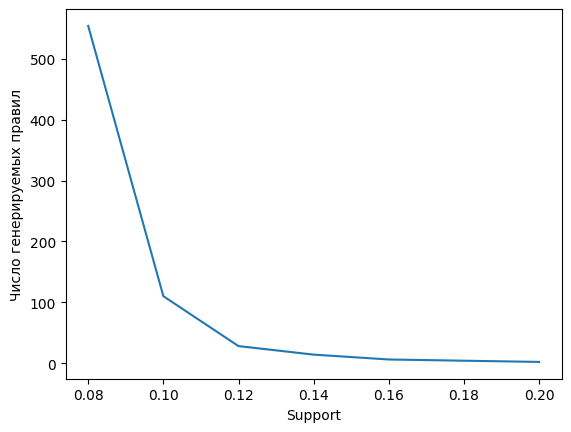

In [17]:
plt.xlabel("Support")
plt.ylabel("Число генерируемых правил")
plt.plot([0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2], itemsets_lengths)

In [18]:
rules_lengths = []
for confidence in [x/10 for x in range(1, 10)]:
    itemset = apriori(new_frame, min_support = 0.1)
    if len(itemset) != 0:
        rule = association_rules(itemset, metric="confidence", min_threshold=confidence)
        rules_lengths.append(len(rule))
    else:
        rules_lengths.append(0)
print(rules_lengths)

[110, 110, 110, 91, 74, 63, 46, 27, 18]


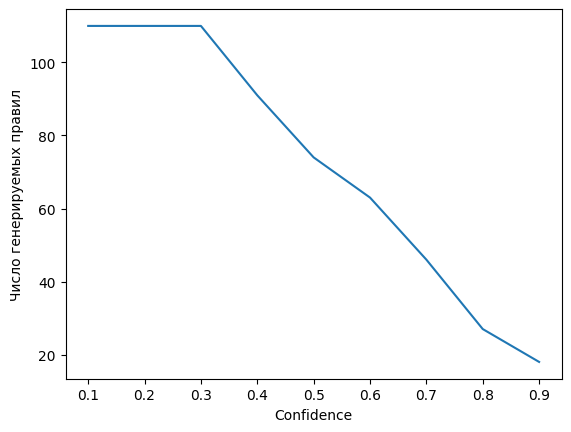

In [19]:
plt.xlabel("Confidence")
plt.ylabel("Число генерируемых правил")
plt.plot([x/10 for x in range(1, 10)], rules_lengths)

In [20]:
spain_data = dataframe.loc[dataframe['Country'] == 'Spain']
encoder = TransactionEncoder()
encoded = encoder.fit_transform(spain_data)
spain_data = pd.DataFrame(encoded)

In [21]:
spain_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,False,False,True,True,False,False,False,False,False,True,...,False,True,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,True,True,False,True
4,False,True,True,False,False,False,False,False,True,True,...,False,True,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2441,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
itemsets = apriori(spain_data, min_support=0.1, use_colnames=True)
itemsets

,support,itemsets


In [23]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)
rules

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.